In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#Roc curve and auc score
from sklearn.datasets import make_classification

c:\users\cdileepkumar\documents\02 python_practice\03 softwares\01 python\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
c:\users\cdileepkumar\documents\02 python_practice\03 softwares\01 python\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
c:\users\cdileepkumar\documents\02 python_practice\03 softwares\01 python\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
c:\users\cdileepkumar\documents\02 python_practice\03 softwares\01 python\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  retu

In [4]:
x,y=make_classification(n_samples=2000,n_classes=2,weights=[1,1],random_state=1)
y
#n_samples -> no.of records
#n_classes -> no of target variable categeries(0 or 1)
#weights -> balanced dataset-> 1:1 for both classifers 0 and 1

array([0, 0, 0, ..., 1, 1, 0])

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)


In [6]:
from sklearn.metrics import roc_curve,roc_auc_score

# Random Forests

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()
rf_model.fit(x_train,y_train)
ytrain_pred=rf_model.predict_proba(x_train)
ytrain_pred # [prob of having value 0,prob of having value 1]

array([[0.99, 0.01],
       [0.98, 0.02],
       [0.02, 0.98],
       ...,
       [1.  , 0.  ],
       [0.98, 0.02],
       [0.23, 0.77]])

In [14]:
print("RF train roc-auc:{}".format(roc_auc_score(y_train,ytrain_pred[:,1])))
ytest_pred=rf_model.predict_proba(x_test)
print("RF test roc-auc:{}".format(roc_auc_score(y_test,ytest_pred[:,1])))

RF train roc-auc:0.9999999999999999
RF test roc-auc:0.9829222222222221


# Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(x_train,y_train)
ytrain_pred=log_classifier.predict_proba(x_train)
print("RF train roc-auc:{}".format(roc_auc_score(y_train,ytrain_pred[:,1])))
ytest_pred=log_classifier.predict_proba(x_test)
print("RF test roc-auc:{}".format(roc_auc_score(y_test,ytest_pred[:,1])))

RF train roc-auc:0.9863568922694498
RF test roc-auc:0.9885777777777777


# Adaboost Classifier

In [19]:
from sklearn.ensemble import AdaBoostClassifier
ada_model=AdaBoostClassifier()
ada_model.fit(x_train,y_train)
ytrain_pred=ada_model.predict_proba(x_train)
ytrain_pred # [prob of having value 0,prob of having value 1]
print("RF train roc-auc:{}".format(roc_auc_score(y_train,ytrain_pred[:,1])))
ytest_pred=rf_model.predict_proba(x_test)
print("RF test roc-auc:{}".format(roc_auc_score(y_test,ytest_pred[:,1])))

RF train roc-auc:0.9975081174960356
RF test roc-auc:0.9853777777777778


# KNNClassifer

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier()
knn_model.fit(x_train,y_train)
ytrain_pred=knn_model.predict_proba(x_train)
ytrain_pred # [prob of having value 0,prob of having value 1]
print("RF train roc-auc:{}".format(roc_auc_score(y_train,ytrain_pred[:,1])))
ytest_pred=rf_model.predict_proba(x_test)
print("RF test roc-auc:{}".format(roc_auc_score(y_test,ytest_pred[:,1])))

RF train roc-auc:0.981670071491109
RF test roc-auc:0.9853777777777778


# Setting the best threshold for maximum accuracy

In [35]:
pred=[]
for model in [rf_model,log_classifier,ada_model,knn_model]:
    pred.append(pd.Series(model.predict_proba(x_test)[:,1]))

len(pred)

4

In [36]:
pd.concat(pred,axis=1)

,0,1,2,3
0,0.97,0.991861,0.559186,1.0
1,0.02,0.000008,0.463282,0.0
2,0.94,0.966929,0.538202,0.8
3,0.95,0.761539,0.509875,0.8
4,0.53,0.779443,0.490344,0.4
...,...,...,...,...
595,0.00,0.024239,0.461121,0.0
596,0.05,0.000003,0.441377,0.0
597,1.00,0.984385,0.532403,1.0
598,0.00,0.001147,0.441720,0.2


In [32]:
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print("Ensemble test roc-auc:{}".format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc:0.9853888888888889


In [37]:
final_prediction

0      0.880262
1      0.120823
2      0.811283
3      0.755353
4      0.549947
         ...   
595    0.121340
596    0.122845
597    0.879197
598    0.160717
599    0.837357
Length: 600, dtype: float64

In [40]:
#Calculate the ROc curve
fpr,tpr,thresholds=roc_curve(y_test,final_prediction)
thresholds

array([1.9134413 , 0.9134413 , 0.90732118, 0.90577475, 0.79097738,
       0.7905558 , 0.78817698, 0.78412833, 0.78159273, 0.78071156,
       0.76053202, 0.76037124, 0.72499037, 0.72387362, 0.70775211,
       0.70643711, 0.65647732, 0.65243537, 0.60707293, 0.60550386,
       0.6040152 , 0.59986186, 0.59745356, 0.59175354, 0.57558969,
       0.55389283, 0.54542732, 0.51377948, 0.51115858, 0.48366892,
       0.4496034 , 0.42536956, 0.41379719, 0.36057343, 0.35586612,
       0.24219741, 0.24140421, 0.22127679, 0.21896893, 0.20688001,
       0.20098417, 0.12284501, 0.1228351 , 0.10632697])

In [42]:
from sklearn.metrics import accuracy_score
accuracy_ls=[]
for thres in thresholds:
    y_pred=np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test,y_pred,normalize=True))
accuracy_ls=pd.concat([pd.Series(thresholds),pd.Series(accuracy_ls)],axis=1)
accuracy_ls.columns=['thresholds','accuracy']
accuracy_ls.sort_values(by='accuracy',ascending=False,inplace=True)
accuracy_ls.head()

,thresholds,accuracy
30,0.449603,0.961667
31,0.425370,0.958333
29,0.483669,0.958333
27,0.513779,0.958333
26,0.545427,0.958333


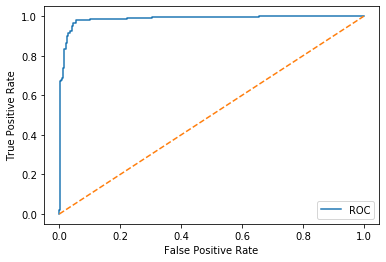

In [44]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,label='ROC')
    plt.plot([0,1],[0,1],linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr,tpr)
    